In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
path="/content/gdrive/MyDrive/data catndog/archive (1).zip"
import zipfile
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('data')

In [19]:
from PIL import Image
for i in range(1, 16):
    image = Image.open(f"data/training_set/training_set/cats/cat.{i}.jpg")
    image.show()

Output hidden; open in https://colab.research.google.com to view.

In [20]:
for i in range(1, 16):
    image = Image.open(f"data/training_set/training_set/dogs/dog.{i}.jpg")
    image.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load the dataset
train_dir = 'data/training_set/training_set'
valid_dir = 'data/test_set/test_set'
batch_size = 32
img_size = (150, 150)

# data preprocessing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary')

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary')

# define neural network architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
epochs = 4
history = model.fit(train_generator, epochs=epochs, validation_data=valid_generator)

# evaluate training accuracy
train_loss, train_acc = model.evaluate(train_generator)
print('Training accuracy:', train_acc)



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/4
251/251 [==============================] - 530s 2s/step - loss: 0.6963 - accuracy: 0.5307 - val_loss: 0.6858 - val_accuracy: 0.5596
Epoch 2/4
251/251 [==============================] - 523s 2s/step - loss: 0.6758 - accuracy: 0.5761 - val_loss: 0.6633 - val_accuracy: 0.6001
Epoch 3/4
251/251 [==============================] - 526s 2s/step - loss: 0.6359 - accuracy: 0.6372 - val_loss: 0.6290 - val_accuracy: 0.6520
Epoch 4/4
251/251 [==============================] - 187s 743ms/step - loss: 0.5393 - accuracy: 0.7312
Training accuracy: 0.7311680316925049


Found 2023 images belonging to 2 classes.
64/64 [==============================] - 38s 585ms/step - loss: 0.5358 - accuracy: 0.7286
Testing accuracy: 0.7286208868026733
64/64 [==============================] - 36s 555ms/step
Confusion Matrix
[[619 392]
 [629 383]]
Classification Report
              precision    recall  f1-score   support

         cat       0.50      0.61      0.55      1011
         dog       0.49      0.38      0.43      1012

    accuracy                           0.50      2023
   macro avg       0.50      0.50      0.49      2023
weighted avg       0.50      0.50      0.49      2023



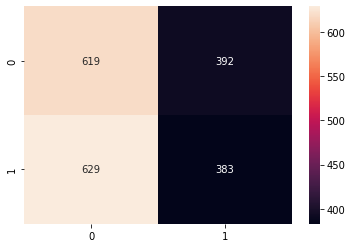

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
test_dir = 'data/test_set/test_set'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator)
print('Testing accuracy:', test_acc)

# predict the labels of the testing dataset
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

# calculate evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
cm=confusion_matrix(test_generator.classes, y_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt='d')

print('Classification Report')
target_names = ['cat', 'dog']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

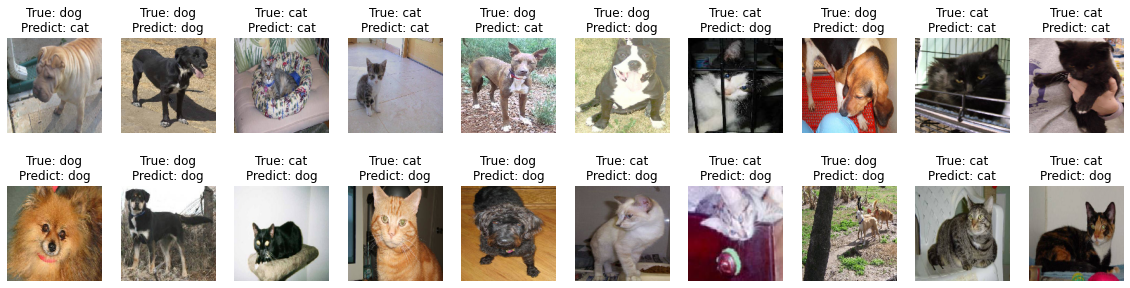

In [ ]:
import matplotlib.pyplot as plt

# display a few testing images with their predicted and actual labels
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 5))
axes = axes.ravel()

for i in range(20):
    img, true_label = test_generator[i]
    axes[i].imshow(img[0])
    axes[i].set_title('True: {}\nPredict: {}'.format(
        'dog' if true_label[0] == 1 else 'cat', 
        'dog' if y_pred[i] == 1 else 'cat'))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.2)
plt.show()